# Making LRM for Multiple features
After implementing some Univariate LRMS, it's time to move on to multiple variables.


This time, too I am somewhat motivated. (Also have exams in 3 days, lol.)
Plus, this time I have basic knowledge and code of tomorrow already.

Let's start with importing some modules.

In [2]:
from sklearn.datasets import make_sparse_uncorrelated

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from matplotlib import style
style.use("ggplot")

### Generating a dataset

Like yesterday, I am generating some dataset, that is sparse and uncorrelated.

It generates a number of samples with single output.

This time I select all the features (starting with minimum of 4).


array([[-1.3347329 ,  0.55402424, -0.57349155,  0.17408486],
       [-0.43334704,  0.60775546, -0.15193519,  1.38718384],
       [-0.64052759, -0.69364283, -0.64055432, -0.89807206],
       ...,
       [-0.39931994, -0.48856147, -1.13413982,  1.16049117],
       [-0.05927587, -0.43983298, -0.78462812, -0.74568801],
       [ 0.36458225,  1.11199267, -1.11996029,  0.07000751]])

<Figure size 1000x1000 with 0 Axes>

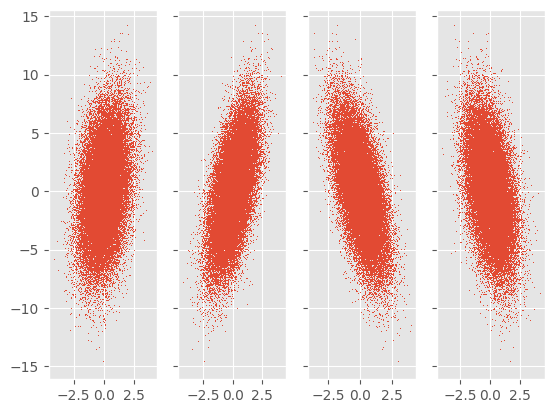

In [34]:
# Generate dataset

# can't take less than 4 features
num_features = 4
num_samples = 40000
X, y = make_sparse_uncorrelated(n_samples=num_samples, n_features= num_features)
# X = X.reshape(num_samples, -1, 1)

plt.figure(figsize=(10,10))
fig, axs = plt.subplots(1,num_features, sharey=True)
# plt.plot(x, y, 'x')
for i in range(num_features):
    axs[i].plot(X[:,i], y, ',') # ',' for pixel plotting
    # fig.suptitle(f"Feature {i+1}")

X


# my_data

# The ML model class:

The class below implements the linear regression model for a multiple input variable (multiple linear regression) 

i.e. sort of 

$ y = w_1 x_1 + w_2 x_2 + w_3 x_3 + .... + w_n x_n + b $

Now, all those weights could be vectorized and so could be the x's.

So:\
$X = [x_1, x_2, ..., x_n]$\
$W = [w_1, w_2, ..., 2_n]$

Thus, the model simplifies as:
$ y = \vec{W} \cdot \vec{X} + b $

$X$  is the input vector with all the features.\
$W$  is the weight vector.\
$b$  is the bias.

But somehow, in python we have to dot X with W because there could be multiple examples of X's



<!-- Contains the functions to 
1. apply the model, 
2. calcualte gradient for least squared error
3. calculate gradient for l1_error
3. see the error value (least squared error and l1)
4. l1 regularization (l2 error with l1 regularization on parameters) -->



Error now = 9.135315354549087, 
gradients = [-0.78967189 -1.56281215  2.97382392  2.30085343] for weight and 
 	 0.18308475631359503 for bias


<Figure size 1000x1000 with 0 Axes>

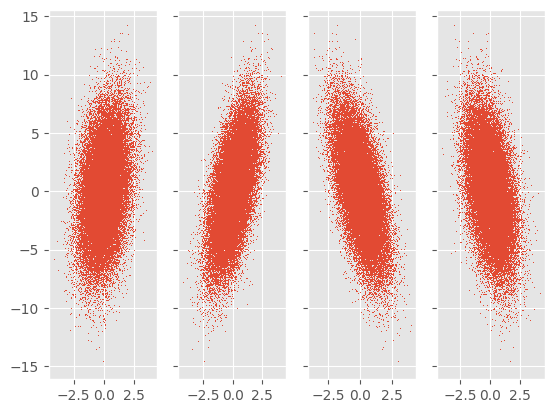

In [37]:

class multiple_linear_regression_model:
    def __init__(self, n_features: int):
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand()
    
    def apply(self, x:float) -> float:
        y = np.dot(x, self.weights) + self.bias
        return y

    
    def lse_gradient(self, x:float, y:float) -> (float, float):
        lenx = len(x)
        assert(lenx == len(y))
        residues = (self.apply(x) - y)
        # print(f"Shape of residues = {residues.shape}")
        grad_weight_list = residues.reshape(-1, 1) * x
        # print(f"Shape of grad weight list = {grad_weight_list.shape}")
        grad_weight = np.sum(grad_weight_list, axis = 0) / lenx
        # print(f"Shape of grad weight = {grad_weight.shape}")
        grad_bias = np.sum(residues) / lenx
        # print(f"Shape of grad bias = {grad_bias.shape}")
        return grad_weight, grad_bias
    
    def lse_value(self, x:float, y:float) -> float:
        lenx = len(x)
        assert(lenx == len(y))
        residues = self.apply(x) - y 
        error = sum(residues ** 2) / (2 * lenx)
        return error

    # def least_squared_error(self, x:float, y:float) -> float:
    #     lenx = len(x)
    #     assert(lenx == len(y))
    #     residue = self.apply(x) - y
    #     error = sum(residue ** 2) / (2 * lenx)
    #     return error
    
    # def lse_gradient(self, x:float , y:float) -> float:
    #     lenx = len(x)
    #     assert(lenx == len(y))
    #     residue = self.apply(x) - y
    #     grada_list = residue / lenx
    #     gradb_list = residue / lenx * x
    #     grada = sum(grada_list)
    #     gradb = sum(gradb_list)
    #     return np.array([grada, gradb]) 

a = multiple_linear_regression_model(num_features)

w_grad, b_grad = a.lse_gradient(X, y)
error = a.lse_value(X, y)
print(f"Error now = {error}, \ngradients = {w_grad} for weight and \n \t {b_grad} for bias")

# for i in range(num_features):
#     plt.plot(X[:,i], y, ',') # ',' for pixel plotting
#     plt.title(f"Feature {i+1}")
#     plt.show()

plt.figure(figsize=(10,10))
fig, axs = plt.subplots(1,num_features, sharey=True)
for i in range(num_features):
    myx = X[:,i]
    axs[i].plot(myx, y, ',') # ',' for pixel plotting


### Visualization part (the most interesting part)
Now I want to visualize linear regression happening

The linear regression's gradient descent happens as:
1. I calcualte the gradient of the loss function.
2. I use the gradient and the learning rate to improve the model.
3. Repeat step 1 and 2 multiple times until I get very good at predection

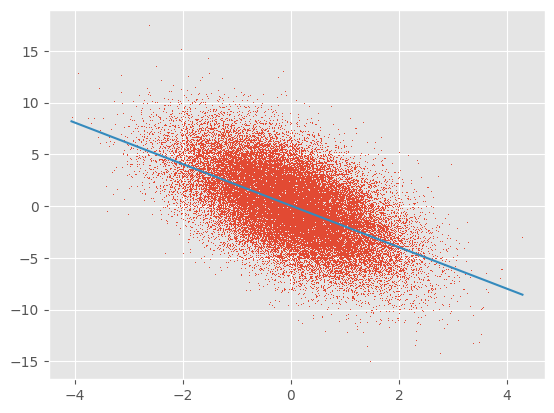

Total error = 4.133456390055839, parameters = [ 0.0380517 -2.0069069]


<Figure size 640x480 with 0 Axes>

In [30]:
# Visualizing l2 (lse) error's grad descent.

from IPython.display import clear_output
my_model = multiple_linear_regression_model(num_features)
learning_rate = .1

plt.ion()
for i in range(100):
    # The three lines are changed
    w_grad, b_grad = my_model.lse_gradient(X,y)
    my_model.weights -= learning_rate * w_grad
    my_model.bias -= learning_rate * b_grad

    # The below lines need to be updated
    linex, liney = my_model.get_plot_points(x)
    error = my_model.least_squared_error(x, y)

    def display():
        plt.cla()
        plt.plot(x, y, ',')
        plt.plot(linex, liney)
        clear_output(wait = True)
        plt.show()

    display()

    print(f"Total error = {error}, parameters = {my_model.parameters}")
    plt.pause(0.01)
    plt.clf()


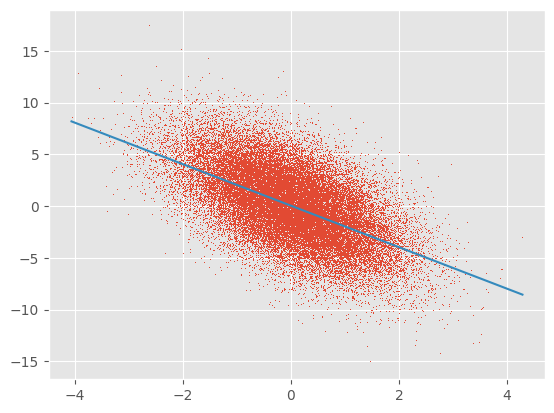

Total error = -inf, parameters = [ 0.03768869 -2.00564913]


<Figure size 640x480 with 0 Axes>

In [32]:
# Visualizing l1_error's gradient descent
from IPython.display import clear_output
my_model = linear_regression_model_univariate()
# If I keep learning rate 10, it will converge very fast
# If I keep 20 or more, it will not converge
# If I keep 1 or low, it will converge slowly
learning_rate = 1
plt.ion()
for i in range(100):
    gradient = my_model.l1_error_gradient(x,y)
    my_model.parameters -= learning_rate * gradient
    linex, liney = my_model.get_plot_points(x)
    error = my_model.l1_error(x, y)

    def display():
        plt.cla()
        plt.plot(x, y, ',')
        plt.plot(linex, liney)
        clear_output(wait = True)
        plt.show()

    display()

    print(f"Total error = {error}, parameters = {my_model.parameters}")
    plt.pause(0.01)
    plt.clf()

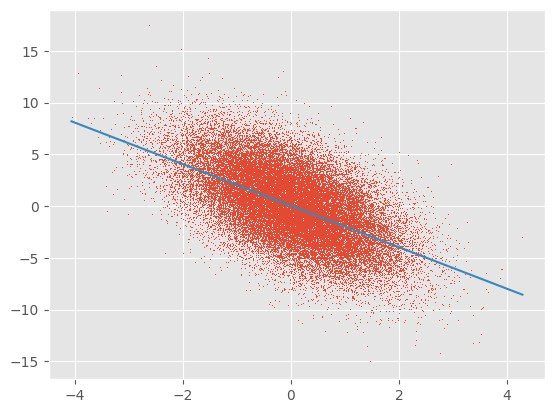

Total error = 5.15596836624061, parameters = [ 0.03804137 -2.00698259]


<Figure size 640x480 with 0 Axes>

In [49]:
# Visualizing lse error with l1 reg's gradient descent
from IPython.display import clear_output
my_model = linear_regression_model_univariate()
# If I keep learning rate 5, it will explode
# If I keep learning rate 2, it will oscillate in some values, without converging
# If I keep learning rate 1, it will converge instantly
# If I keep learning rate 0.1 or below converge slowly
learning_rate = 1
plt.ion()
for i in range(50):
    gradient = my_model.lse_with_l1_regularization_grad(x,y)
    my_model.parameters -= learning_rate * gradient
    linex, liney = my_model.get_plot_points(x)
    error = my_model.lse_with_l1_regularization_error(x, y)

    def display():
        plt.cla()
        plt.plot(x, y, ',')
        plt.plot(linex, liney)
        clear_output(wait = True)
        plt.show()

    display()

    print(f"Total error = {error}, parameters = {my_model.parameters}")
    plt.pause(0.01)
    plt.clf()